### Exercise 4.8, Problem 13

In [67]:
#imports
import pandas as pd
import seaborn as sn
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

# Load StatsModels API
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 


#### PART A : 
Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [43]:
df = pd.read_csv('Data/Weekly.csv');
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


*By looking at the info above, we can see that there are 1089 entries in 9 columns. They are all float64 data types, aside from year, which is an int64, and direction, which is an object.*

In [44]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


*Add Description*

<AxesSubplot:>

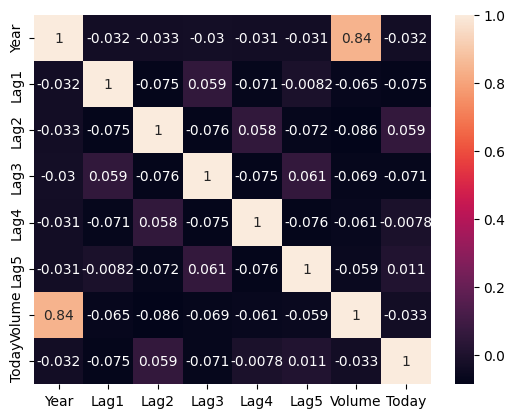

In [45]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

*The only variables that appear to have significant linear relationship are Volume and Year*

#### PART B : 
Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [46]:
model = sm.formula.glm("Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume", family=sm.families.Binomial(), data=df).fit()
print(model.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    Logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Tue, 04 Oct 2022   Deviance:                       1486.4
Time:                                          10:58:16   Pearson chi2:                 1.09e+03
No. Iterations:                                       4   Pseudo R-squ. (CS):           0.009000
Covariance Type:                              nonrobust                                         
                 coef    std e

*The only value at the level of significane is Lag2. The other values fail to reject the null hypotheses of β = 0*

#### PART C : 
Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [47]:
#Create a confusion matrix
probs = model.predict()
pred = np.tile([0], len(probs))
pred[probs>.5]=1

df.loc[df["Direction"] == "Up", "Direction"] = 1
df.loc[df["Direction"] == "Down", "Direction"] = 0

diff = df.Direction - pred

cunf_mat = {"Direction":['Down', 'Up'], "Down":[len(np.where(diff == -1)[0]), len(np.where(diff == 0)[0])], "Up":[len(np.where(diff != 0)[0]), len(np.where(diff == 1)[0])]}
cunf_mat

{'Direction': ['Down', 'Up'], 'Down': [54, 478], 'Up': [611, 557]}

It can be concluded from the above output, the percentage of correct predictions is (54+557)/1089, which is roughly 56%. Resultantly the error rate is 43%. 

#### PART D : 
Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [48]:
train = df[df.Year < 2009]
model2 = sm.formula.glm("Direction~Lag2", family=sm.families.Binomial(), data=train).fit()
print(model2.summary())
prod2 = model2.predict()
pred2 = np.tile([0], len(prod2))
pred2[prod2>.5]=1

diff2 = train.Direction - pred2
cunf_mat = {"Direction":['Down', 'Up'], "Down":[len(np.where(diff2 == -1)[0]), len(np.where(diff2 == 0)[0])], "Up":[len(np.where(diff2 != 0)[0]), len(np.where(diff2 == 1)[0])]}
cunf_mat

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['Direction[0]', 'Direction[1]']   No. Observations:                  985
Model:                                          GLM   Df Residuals:                      983
Model Family:                              Binomial   Df Model:                            1
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -675.27
Date:                              Tue, 04 Oct 2022   Deviance:                       1350.5
Time:                                      10:58:20   Pearson chi2:                     985.
No. Iterations:                                   4   Pseudo R-squ. (CS):           0.004221
Covariance Type:                          nonrobust                                         
                 coef    std err          z      P>|z|      [0.025    

{'Direction': ['Down', 'Up'], 'Down': [23, 438], 'Up': [547, 524]}

The percentage of correct prediction is (23+542)/985 = 57.36%

#### PART E : 
Repeat (d) using LDA.

In [66]:
lda = LDA()
model2 = lda.fit(train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], train.Year)

prod2 = lda.predict(train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])
pred2 = np.tile([0], len(prod2))
pred2[prod2>.5]=1

diff2 = train.Direction - pred2
cunf_mat = {"Direction":['Down', 'Up'], "Down":[len(np.where(diff2 == -1)[0]), len(np.where(diff2 == 0)[0])], "Up":[len(np.where(diff2 != 0)[0]), len(np.where(diff2 == 1)[0])]}
cunf_mat

{'Direction': ['Down', 'Up'], 'Down': [441, 544], 'Up': [441, 0]}

The percentage of correct prediction is (441+544)/985 = 69%

#### PART F : 
Repeat (d) using QDA.

In [68]:
qda = QuadraticDiscriminantAnalysis()
model2 = lda.fit(train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], train.Year)

prod2 = lda.predict(train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])
pred2 = np.tile([0], len(prod2))
pred2[prod2>.5]=1

diff2 = train.Direction - pred2
cunf_mat = {"Direction":['Down', 'Up'], "Down":[len(np.where(diff2 == -1)[0]), len(np.where(diff2 == 0)[0])], "Up":[len(np.where(diff2 != 0)[0]), len(np.where(diff2 == 1)[0])]}
cunf_mat

{'Direction': ['Down', 'Up'], 'Down': [441, 544], 'Up': [441, 0]}

The percentage of correct prediction is (441+544)/985 = 69%

#### PART G : 
Repeat (d) using KNN with K = 1.

#### PART H : 
Repeat (d) using naive Bayes.

#### PART I : 
Which of these methods appears to provide the best results on this data?

#### PART J : 
Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.